In [1]:
import re
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use("seaborn-notebook")
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
input_path = '/content/drive/MyDrive/IdentityResolution.csv'
dataset = pd.read_csv(input_path, encoding= 'unicode_escape', low_memory=False)
dataset

,Alain Stephan Domnguez Lucas,https://www.twitter.com/alainstephan,http://www.facebook.com/alainpato,http://instagram.com/alainstephan
0,Alex Sablan,https://www.twitter.com/AlexSablancom,https://facebook.com/alexsablancom,http://instagram.com/a_sablan
1,Xavier Gass,https://www.twitter.com/XaviGasso,http://www.facebook.com/xgasso,http://instagram.com/xavigasso
2,Nicole Lapin,https://www.twitter.com/NicoleLapin,http://www.facebook.com/nicolelapin,http://instagram.com/nicolelapin
3,Mattan Griffel,https://www.twitter.com/mattangriffel,http://www.facebook.com/mattangriffel,http://instagram.com/mattangriffel
4,Shashank Bharadwaj,https://www.twitter.com/snk,https://www.facebook.com/shashu10,http://instagram.com/shashu10
...,...,...,...,...
318,Vasu Chawla,https://twitter.com/VasuChawla,https://facebook.com/vasuchawla26,https://instagram.com/vasuchawla
319,Dayn Wilberding,http://www.twitter.com/dayn,http://www.facebook.com/daynw,http://instagram.com/dayn
320,Guillermo Navarro,https://www.twitter.com/bildenlex,https://www.facebook.com/DRGUILLERMONAVARRO,http://instagram.com/bildenlex
321,Antonio J. Cuevas,https://www.twitter.com/Zeroneuronas,http://www.facebook.com/antonio.j.cuevas,http://instagram.com/zeroneuronas


**Separating Usernames of twitter,Facebook and instagram**

In [3]:
dataset['twitter'] = [x.split('/')[-1] if '/' in str(x) else x for x in dataset['https://www.twitter.com/alainstephan']]
dataset['facebook'] = [x.split('/')[-1] if '/' in str(x) else x for x in dataset['http://www.facebook.com/alainpato']]
dataset['instagram'] = [x.split('/')[-1] if '/' in str(x) else x for x in dataset['http://instagram.com/alainstephan']]
dataset

,Alain Stephan Domnguez Lucas,https://www.twitter.com/alainstephan,http://www.facebook.com/alainpato,http://instagram.com/alainstephan,twitter,facebook,instagram
0,Alex Sablan,https://www.twitter.com/AlexSablancom,https://facebook.com/alexsablancom,http://instagram.com/a_sablan,AlexSablancom,alexsablancom,a_sablan
1,Xavier Gass,https://www.twitter.com/XaviGasso,http://www.facebook.com/xgasso,http://instagram.com/xavigasso,XaviGasso,xgasso,xavigasso
2,Nicole Lapin,https://www.twitter.com/NicoleLapin,http://www.facebook.com/nicolelapin,http://instagram.com/nicolelapin,NicoleLapin,nicolelapin,nicolelapin
3,Mattan Griffel,https://www.twitter.com/mattangriffel,http://www.facebook.com/mattangriffel,http://instagram.com/mattangriffel,mattangriffel,mattangriffel,mattangriffel
4,Shashank Bharadwaj,https://www.twitter.com/snk,https://www.facebook.com/shashu10,http://instagram.com/shashu10,snk,shashu10,shashu10
...,...,...,...,...,...,...,...
318,Vasu Chawla,https://twitter.com/VasuChawla,https://facebook.com/vasuchawla26,https://instagram.com/vasuchawla,VasuChawla,vasuchawla26,vasuchawla
319,Dayn Wilberding,http://www.twitter.com/dayn,http://www.facebook.com/daynw,http://instagram.com/dayn,dayn,daynw,dayn
320,Guillermo Navarro,https://www.twitter.com/bildenlex,https://www.facebook.com/DRGUILLERMONAVARRO,http://instagram.com/bildenlex,bildenlex,DRGUILLERMONAVARRO,bildenlex
321,Antonio J. Cuevas,https://www.twitter.com/Zeroneuronas,http://www.facebook.com/antonio.j.cuevas,http://instagram.com/zeroneuronas,Zeroneuronas,antonio.j.cuevas,zeroneuronas


**Dropping the link columns and only keeping username columns**

In [4]:
dataset.drop(columns = ['https://www.twitter.com/alainstephan','http://www.facebook.com/alainpato','http://instagram.com/alainstephan'],inplace = True)

In [5]:
dataset

,Alain Stephan Domnguez Lucas,twitter,facebook,instagram
0,Alex Sablan,AlexSablancom,alexsablancom,a_sablan
1,Xavier Gass,XaviGasso,xgasso,xavigasso
2,Nicole Lapin,NicoleLapin,nicolelapin,nicolelapin
3,Mattan Griffel,mattangriffel,mattangriffel,mattangriffel
4,Shashank Bharadwaj,snk,shashu10,shashu10
...,...,...,...,...
318,Vasu Chawla,VasuChawla,vasuchawla26,vasuchawla
319,Dayn Wilberding,dayn,daynw,dayn
320,Guillermo Navarro,bildenlex,DRGUILLERMONAVARRO,bildenlex
321,Antonio J. Cuevas,Zeroneuronas,antonio.j.cuevas,zeroneuronas


# **Similarity Between Instagram and Facebook**

**Using Levenshtein Distance.**

**The Levenshtein distance is a similarity measure between words. Given two words, the distance measures the number of edits needed to transform one word into another.**

Installing the library strsim which contains all the distance metrics

In [6]:
!pip install strsim

     |████████████████████████████████| 42 kB 975 kB/s 


In [7]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()
result = pd.DataFrame()
result["fb_insta_leven"] = [normalized_levenshtein.similarity(i, j) for i,j in zip(dataset['facebook'],dataset['instagram'])]
result

,fb_insta_leven
0,0.538462
1,0.666667
2,1.000000
3,1.000000
4,1.000000
...,...
318,0.833333
319,0.800000
320,0.000000
321,0.250000


**Using Jaro Winkler**

**Jaro Similarity is the measure of similarity between two strings. The value of Jaro distance ranges from 0 to 1. where 1 means the strings are equal and 0 means no similarity between the two strings.**

**The Jaro-Winkler similarity is a string metric measuring edit distance between two strings. Jaro – Winkler Similarity is much similar to Jaro Similarity. They both differ when the prefix of two string match. Jaro – Winkler Similarity uses a prefix scale ‘p’ which gives a more accurate answer when the strings have a common prefix up to a defined maximum length l.**

In [8]:
from similarity.jarowinkler import JaroWinkler
from similarity.cosine import Cosine

In [9]:
jarowinkler = JaroWinkler()
result["fb_insta_jaro"] = [jarowinkler.similarity(i, j) for i,j in zip(dataset['facebook'],dataset['instagram'])]
result

,fb_insta_leven,fb_insta_jaro
0,0.538462,0.731615
1,0.666667,0.850000
2,1.000000,1.000000
3,1.000000,1.000000
4,1.000000,1.000000
...,...,...
318,0.833333,0.990741
319,0.800000,0.960000
320,0.000000,0.000000
321,0.250000,0.597222


# **Similarity Between Instagram and Twitter**

**Using Levenshtein Distance.**

**The Levenshtein distance is a similarity measure between words. Given two words, the distance measures the number of edits needed to transform one word into another.**

Installing the library strsim which contains all the distance metrics

In [10]:
!pip install strsim

In [11]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()
result['insta_twitter_leven'] = [normalized_levenshtein.similarity(i, j) for i,j in zip(dataset['twitter'],dataset['instagram'])]
result

,fb_insta_leven,fb_insta_jaro,insta_twitter_leven
0,0.538462,0.731615,0.384615
1,0.666667,0.850000,0.777778
2,1.000000,1.000000,0.818182
3,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.125000
...,...,...,...
318,0.833333,0.990741,0.800000
319,0.800000,0.960000,1.000000
320,0.000000,0.000000,1.000000
321,0.250000,0.597222,0.916667


**Using Jaro Winkler**

**Jaro Similarity is the measure of similarity between two strings. The value of Jaro distance ranges from 0 to 1. where 1 means the strings are equal and 0 means no similarity between the two strings.**

**The Jaro-Winkler similarity is a string metric measuring edit distance between two strings. Jaro – Winkler Similarity is much similar to Jaro Similarity. They both differ when the prefix of two string match. Jaro – Winkler Similarity uses a prefix scale ‘p’ which gives a more accurate answer when the strings have a common prefix up to a defined maximum length l.**

In [12]:
from similarity.jarowinkler import JaroWinkler
from similarity.cosine import Cosine

In [13]:
jarowinkler = JaroWinkler()
result["insta_twitter_jaro"] = [jarowinkler.similarity(i, j) for i,j in zip(dataset['twitter'],dataset['instagram'])]
result

,fb_insta_leven,fb_insta_jaro,insta_twitter_leven,insta_twitter_jaro
0,0.538462,0.731615,0.384615,0.603205
1,0.666667,0.850000,0.777778,0.851852
2,1.000000,1.000000,0.818182,0.878788
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.125000,0.486111
...,...,...,...,...
318,0.833333,0.990741,0.800000,0.866667
319,0.800000,0.960000,1.000000,1.000000
320,0.000000,0.000000,1.000000,1.000000
321,0.250000,0.597222,0.916667,0.944444


#**Similarity between Facebook and Twitter** 

**Using Levenshtein Distance.**

**The Levenshtein distance is a similarity measure between words. Given two words, the distance measures the number of edits needed to transform one word into another.**

In [14]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()
result["fb_twitter_leven"] = [normalized_levenshtein.similarity(i, j) for i,j in zip(dataset['facebook'],dataset['twitter'])]
result

,fb_insta_leven,fb_insta_jaro,insta_twitter_leven,insta_twitter_jaro,fb_twitter_leven
0,0.538462,0.731615,0.384615,0.603205,0.846154
1,0.666667,0.850000,0.777778,0.851852,0.444444
2,1.000000,1.000000,0.818182,0.878788,0.818182
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.125000,0.486111,0.125000
...,...,...,...,...,...
318,0.833333,0.990741,0.800000,0.866667,0.666667
319,0.800000,0.960000,1.000000,1.000000,0.800000
320,0.000000,0.000000,1.000000,1.000000,0.000000
321,0.250000,0.597222,0.916667,0.944444,0.250000


**Using Jaro Winkler**

**Jaro Similarity is the measure of similarity between two strings. The value of Jaro distance ranges from 0 to 1. where 1 means the strings are equal and 0 means no similarity between the two strings.**

**The Jaro-Winkler similarity is a string metric measuring edit distance between two strings. Jaro – Winkler Similarity is much similar to Jaro Similarity. They both differ when the prefix of two string match. Jaro – Winkler Similarity uses a prefix scale ‘p’ which gives a more accurate answer when the strings have a common prefix up to a defined maximum length l.**

In [15]:
from similarity.jarowinkler import JaroWinkler
from similarity.cosine import Cosine

In [16]:
jarowinkler = JaroWinkler()
result["facebook_twitter_jaro"] = [jarowinkler.similarity(i, j) for i,j in zip(dataset['twitter'],dataset['facebook'])]
result

,fb_insta_leven,fb_insta_jaro,insta_twitter_leven,insta_twitter_jaro,fb_twitter_leven,facebook_twitter_jaro
0,0.538462,0.731615,0.384615,0.603205,0.846154,0.806527
1,0.666667,0.850000,0.777778,0.851852,0.444444,0.703704
2,1.000000,1.000000,0.818182,0.878788,0.818182,0.878788
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.125000,0.486111,0.125000,0.486111
...,...,...,...,...,...,...
318,0.833333,0.990741,0.800000,0.866667,0.666667,0.822222
319,0.800000,0.960000,1.000000,1.000000,0.800000,0.960000
320,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
321,0.250000,0.597222,0.916667,0.944444,0.250000,0.597222


# **Plotting the similarities**

**Similarity between facebook and Instagram**

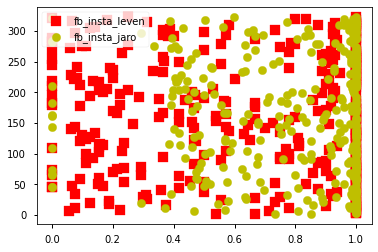

In [17]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = result['fb_insta_leven']
x_count = []
for i in range(1,324):
  x_count.append(i)
y = result['fb_insta_jaro']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x,x_count ,s=100, c='r', marker="s", label='fb_insta_leven')
ax1.scatter(y,x_count, s=70, c='y', marker="o", label='fb_insta_jaro')
plt.legend(loc='upper left');
plt.show()

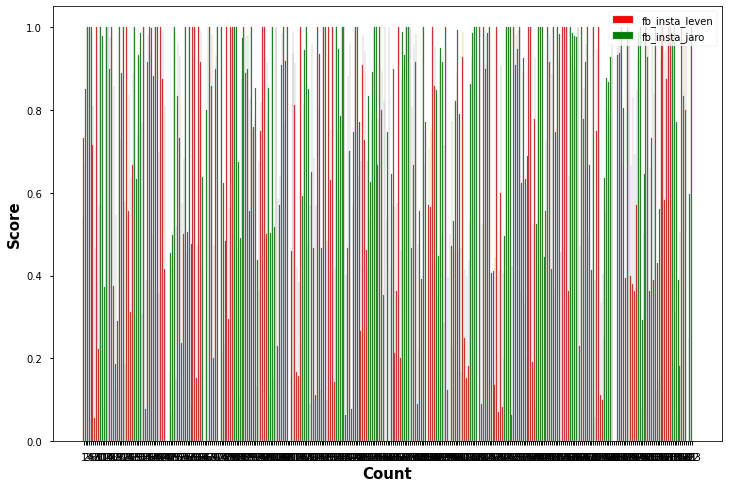

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['fb_insta_leven']
y = result['fb_insta_jaro']
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]
x_count = []
for i in range(1,324):
  x_count.append(i)
# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count)

plt.legend()
plt.show()


**As graph is too dense we plot on top 10**

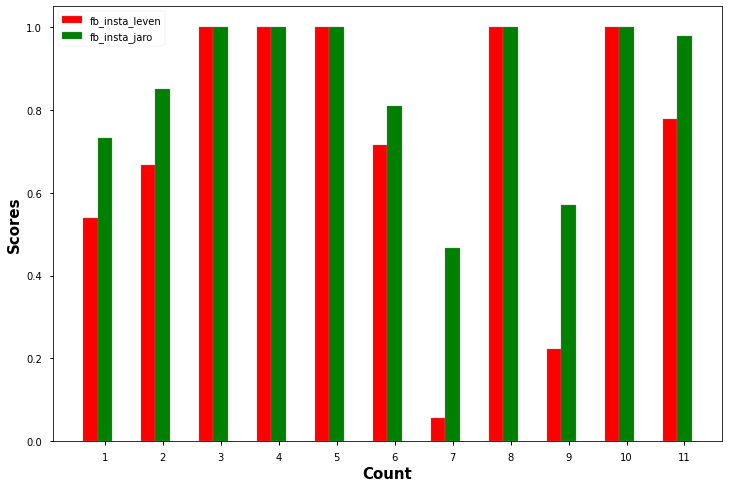

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['fb_insta_leven']
y = result['fb_insta_jaro']
x = x[0:11]
y = y[0:11]
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]

# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count[0:11])

plt.legend()
plt.show()


**Plotting similarities between Instagram and Twitter**

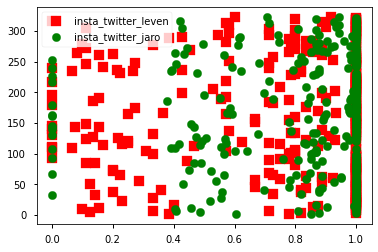

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = result['insta_twitter_leven']
y = result['insta_twitter_jaro']
x_count = []
for i in range(1,324):
  x_count.append(i)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, x_count, s=100, c='r', marker="s", label='insta_twitter_leven')
ax1.scatter(y,x_count, s=70, c='g', marker="o", label='insta_twitter_jaro')
plt.legend(loc='upper left');
plt.show()

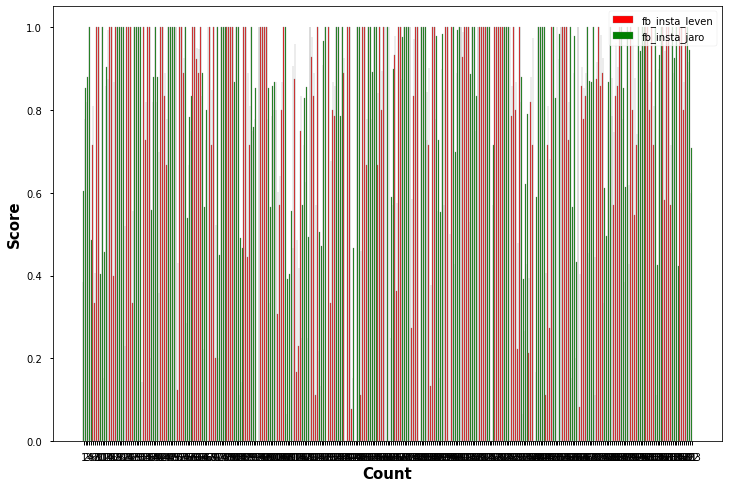

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['insta_twitter_leven']
y = result['insta_twitter_jaro']
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]
x_count = []
for i in range(1,324):
  x_count.append(i)
# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count)

plt.legend()
plt.show()


**As graph is too dense we plot on top 10**

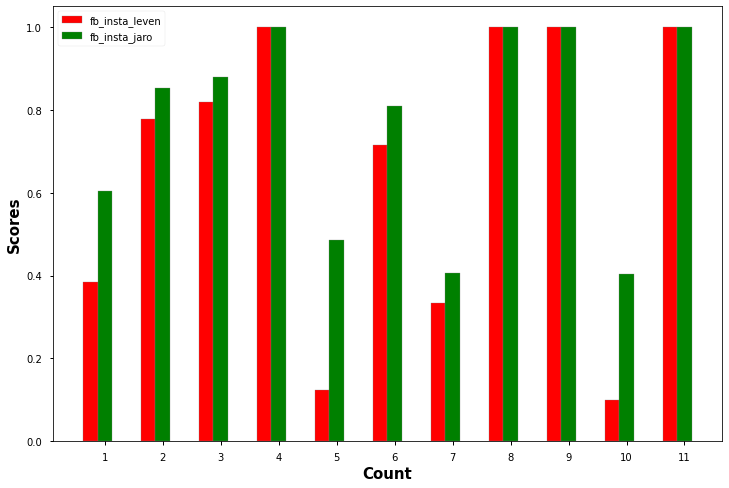

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['insta_twitter_leven']
y = result['insta_twitter_jaro']
x = x[0:11]
y = y[0:11]
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]

# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count[0:11])

plt.legend()
plt.show()


**Plotting Facebook and twitter**

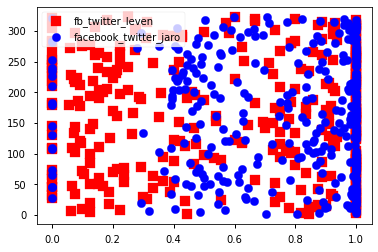

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = result['fb_twitter_leven']
y = result['facebook_twitter_jaro']
x_count = []
for i in range(1,324):
  x_count.append(i)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, x_count, s=100, c='r', marker="s", label='fb_twitter_leven')
ax1.scatter(y,x_count, s=70, c='b', marker="o", label='facebook_twitter_jaro')
plt.legend(loc='upper left');
plt.show()

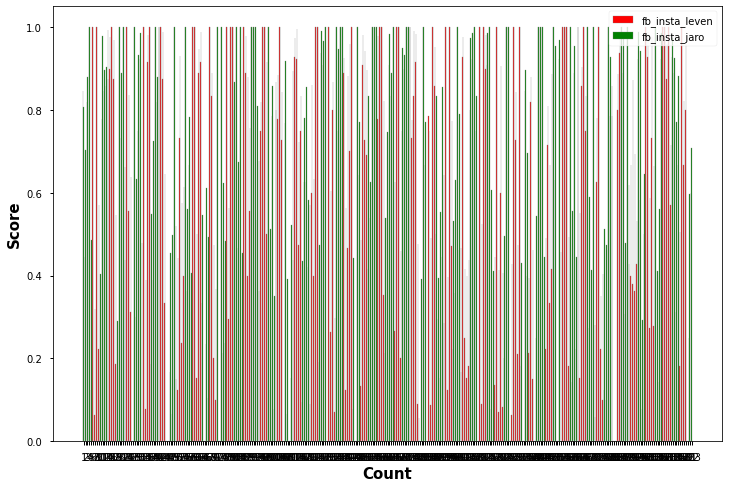

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['fb_twitter_leven']
y = result['facebook_twitter_jaro']
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]
x_count = []
for i in range(1,324):
  x_count.append(i)
# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count)

plt.legend()
plt.show()


**As graph is too dense we plot on top 10**

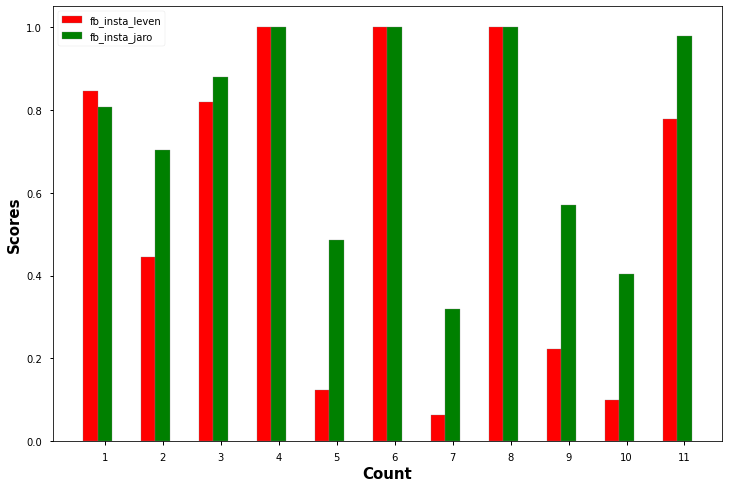

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
x = result['fb_twitter_leven']
y = result['facebook_twitter_jaro']
x = x[0:11]
y = y[0:11]
# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x1 + barWidth for x1 in br1]

# Make the plot
plt.bar(br1, x, color ='r', width = barWidth,
		edgecolor ='grey', label ='fb_insta_leven')
plt.bar(br2, y, color ='g', width = barWidth,
		edgecolor ='grey', label ='fb_insta_jaro')

# Adding Xticks
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x_count[0:11])

plt.legend()
plt.show()


**Count of similar values in facebook and twitter using levenshtein**

In [ ]:
result["fb_twitter_leven"].value_counts()


1.000000    89
0.000000    26
0.125000     8
0.750000     7
0.923077     6
            ..
0.470588     1
0.769231     1
0.571429     1
0.307692     1
0.133333     1
Name: fb_twitter_leven, Length: 89, dtype: int64

**Count of similar values in facebook and twitter using Jaro**

In [ ]:
result["facebook_twitter_jaro"].value_counts()

1.000000    89
0.000000    19
0.833333     4
0.866667     3
0.986193     3
            ..
0.707937     1
0.806527     1
0.614815     1
0.626374     1
0.486111     1
Name: facebook_twitter_jaro, Length: 186, dtype: int64

**As we can see that most of the usernames in facebook and twitter were same as the similarity is 1 making it prone to information theft**

**Count of similar values in facebook and instagram using levenshtein**

In [ ]:
result["fb_insta_leven"].value_counts()


1.000000    104
0.000000     17
0.363636      6
0.666667      6
0.923077      6
           ... 
0.071429      1
0.380952      1
0.133333      1
0.157895      1
0.700000      1
Name: fb_insta_leven, Length: 86, dtype: int64

**Count of similar values in facebook and instagram using Jaro**

In [ ]:
result["fb_insta_jaro"].value_counts()

1.000000    101
0.000000     14
0.977778      3
0.851852      3
0.988095      3
           ... 
0.555556      1
0.822376      1
0.624242      1
0.626374      1
0.401786      1
Name: fb_insta_jaro, Length: 186, dtype: int64

**As compared to facebook and twitter, facebook and instagram have more similar usernames making it more prone to theft of privacy**

**Count of similar values in twitter and instagram using levenshtein**

In [ ]:
result["insta_twitter_leven"].value_counts()


1.000000    160
0.800000     12
0.000000     11
0.714286      9
0.777778      7
0.888889      7
0.833333      6
0.571429      6
0.111111      6
0.333333      5
0.818182      5
0.750000      4
0.583333      4
0.785714      4
0.666667      4
0.857143      4
0.727273      4
0.200000      4
0.875000      4
0.153846      4
0.250000      3
0.428571      3
0.900000      2
0.066667      2
0.928571      2
0.230769      2
0.923077      2
0.222222      2
0.166667      2
0.100000      2
0.125000      2
0.133333      2
0.142857      2
0.384615      2
0.272727      2
0.625000      1
0.217391      1
0.357143      1
0.444444      1
0.285714      1
0.529412      1
0.555556      1
0.214286      1
0.266667      1
0.600000      1
0.083333      1
0.454545      1
0.916667      1
0.545455      1
0.933333      1
0.466667      1
0.400000      1
0.307692      1
0.363636      1
0.076923      1
0.909091      1
Name: insta_twitter_leven, dtype: int64

**Count of similar values in insta and twitter using Jaro**

In [ ]:
result["insta_twitter_jaro"].value_counts()

1.000000    154
0.000000     15
0.866667     10
0.878788      5
0.851852      5
           ... 
0.933333      1
0.584848      1
0.972789      1
0.620757      1
0.948148      1
Name: insta_twitter_jaro, Length: 113, dtype: int64

**More than half of usernames were same in both instagram and twitter.**

**As looking up the values following summarization can be done**

**Similarity of (instagram and twitter)> Similarity of (facebook and Instagram) > Similarity of (facebook  and twitter)**